In [1]:
import os
import sys
from collections import OrderedDict
sys.path.append("../../..")
import spatialpy
print(spatialpy.__file__)
import matplotlib.pyplot as plt
import numpy
%load_ext autoreload
%autoreload 2

/Users/bryanrumsey/Documents/SpatialPy/examples/Under_Construction/turing_pattern/../../../spatialpy/__init__.py


In [2]:
class turingPattern(spatialpy.Model):

    def __init__(self, model_name="turingPattern"):
        spatialpy.Model.__init__(self, model_name)

        diff_const = 0.1
   
        A = spatialpy.Species(name="A", diffusion_coefficient=diff_const)
        B = spatialpy.Species(name="B", diffusion_coefficient=diff_const)
        D = spatialpy.Species(name="D", diffusion_coefficient=diff_const)
        E = spatialpy.Species(name="E", diffusion_coefficient=diff_const)
        X = spatialpy.Species(name="X", diffusion_coefficient=diff_const)
        Y = spatialpy.Species(name="Y", diffusion_coefficient=diff_const)
        self.add_species([A,B,D,E,X,Y])

        domain = spatialpy.Domain.create_2D_domain(
            nx=30, ny=30, xlim=[-1, 1], ylim=[-1, 1], fixed=True, type_id=1
        )
        self.add_domain(domain)

        Rate1 = spatialpy.Parameter("Rate1", expression=5000.0)
        Rate2 = spatialpy.Parameter("Rate2", expression=50.0)
        Rate3 = spatialpy.Parameter("Rate3", expression=0.0005)
        Rate4 = spatialpy.Parameter("Rate4", expression=5.0)
        self.add_parameter([Rate1, Rate2, Rate3, Rate4])

        Reaction1 = spatialpy.Reaction(reactants={}, products={X:1}, rate=Rate1)
        Reaction2 = spatialpy.Reaction(reactants={B:1, X:1}, products={Y:1, D:1},
                                       propensity_function="(Rate2 * B * X)/vol")
        Reaction3 = spatialpy.Reaction(reactants={X:2, Y:1}, products={X:3},
                                       propensity_function="(((Rate3 * X * (X-1))/2)* Y)/vol")
        Reaction4 = spatialpy.Reaction(reactants={X:1}, products={E:1}, propensity_function="Rate4 * X")
        self.add_reaction([Reaction1, Reaction2, Reaction3, Reaction4])

        #self.add_initial_condition(spatialpy.ScatterCondition(A, 200, [1]))
        self.add_initial_condition(spatialpy.ScatterInitialCondition(B, 200, [1]))
        self.add_initial_condition(spatialpy.ScatterInitialCondition(D, 20, [1]))
        self.add_initial_condition(spatialpy.ScatterInitialCondition(E, 20, [1]))
        self.add_initial_condition(spatialpy.ScatterInitialCondition(X, 20, [1]))
        self.add_initial_condition(spatialpy.ScatterInitialCondition(Y, 20, [1]))

        self.staticDomain = True

        self.timespan(range(0,10))

In [3]:
model = turingPattern()

In [4]:
from spatialpy import Solver
sol = Solver(model, debug_level=0)
%time sol.compile()
print(sol.build_dir)

CPU times: user 21.4 ms, sys: 5.1 ms, total: 26.5 ms
Wall time: 474 ms
/var/folders/z4/bqpnd_kx7xg3s3c9jtz0pnfh0000gn/T/spatialpy_build_dba95p43


In [20]:
%time result = sol.run()

build(propensitySum=177343, activeChannels=900, timeOffset=0simulationEndTime=9)
Diffusion propensity mismatch in voxel 192. spec=6, sdrate[subvol]=4.579019e+07 cum=4.579019e+07 diff_rand=4.579019e+07
CPU times: user 1.2 s, sys: 214 ms, total: 1.42 s
Wall time: 13h 18min 1s


In [ ]:
#from spatialpy import Solver
#sol2 = Solver(model, debug_level=1)
#sol2.compile()

In [21]:
speciesX = result.get_species("X")

In [22]:
speciesX.sum(axis=1)

array([2.000000e+01, 5.230370e+05, 1.519990e+06, 2.446540e+06,
       3.358185e+06, 4.262284e+06, 5.161781e+06, 6.057778e+06,
       6.955008e+06, 7.846508e+06])

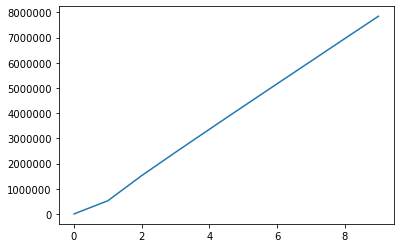

In [29]:
plt.plot(result.get_timespan(), speciesX.sum(axis=1))

In [23]:
result.plot_species("X", t_ndx_list=[0,1,2,3,4,5,7,8,9], animated=True)

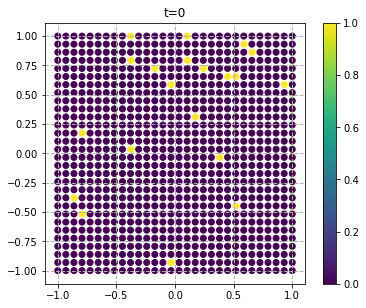

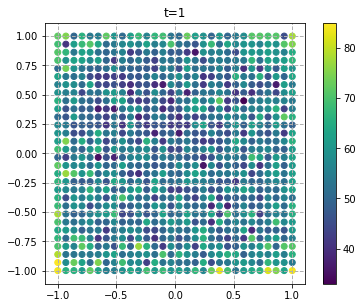

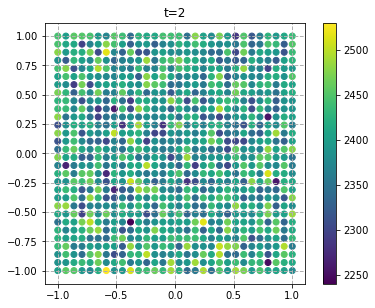

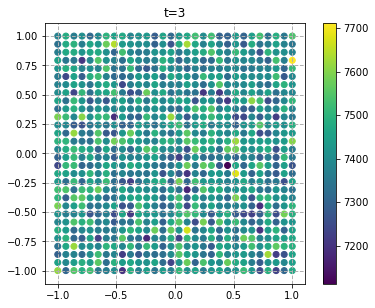

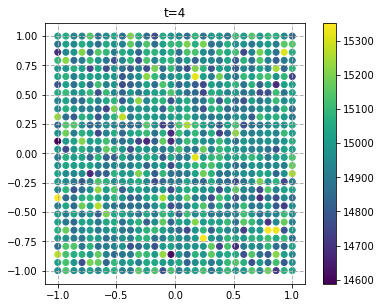

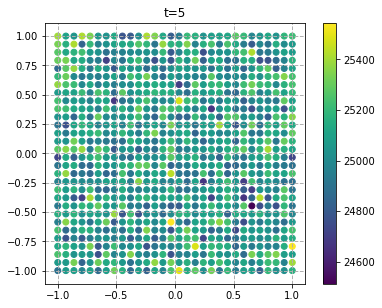

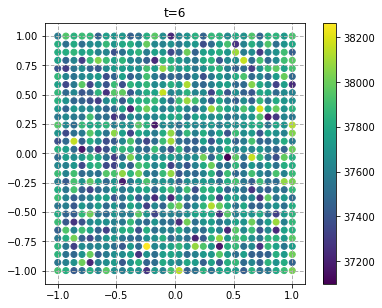

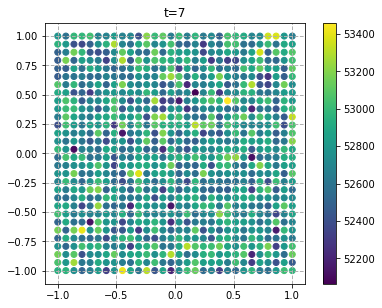

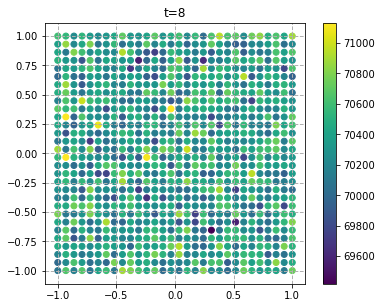

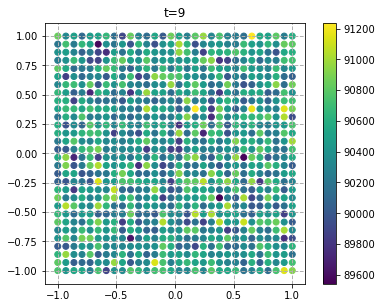

In [28]:
for i,t in enumerate(result.get_timespan()):
    #print(i,t)
    result.plot_species("E", i, use_matplotlib=True)
    plt.title(f"t={int(t)}")